In [0]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Apr 28 09:00:31 2020

@author: yash
"""

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Apr 25 20:36:32 2020

@author: yash
"""

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
import numpy as np
from sklearn.metrics import average_precision_score, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, roc_curve
#from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

dataset = pd.read_csv('creditcard.csv')

No_of_frauds= len(dataset[dataset["Class"]==1])
normal_index= dataset[dataset["Class"]==0].index
random_normal_indices= np.random.choice(normal_index, No_of_frauds, replace= False)
random_normal_indices= np.array(random_normal_indices)

fraud_index= np.array(dataset[dataset["Class"]==1].index)

undersampled_indices= np.concatenate([fraud_index, random_normal_indices])
undersampled_data= dataset.iloc[undersampled_indices, :]


X = undersampled_data.iloc[:, 0:30].values
Y = undersampled_data.iloc[:, 30].values

X_full = dataset.iloc[:, 0:30].values
Y_full = dataset.iloc[:, 30].values


best_c = 0
max_bal_accuracy = 0

C_values = [0.05, 0.1, 0.25, 0.5]
for c in range(len(C_values)):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, shuffle=True, random_state = 42,  stratify = None)
  #X_full_train, X_full_test, Y_full_train, Y_full_test = train_test_split(X_full, Y_full, test_size = , shuffle=True, random_state = 42,  stratify = None)

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  #X_full_test = sc.transform(X_full_test)

  model = SVC(C = C_values[c], kernel = 'linear')

  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_test)

  bal_accuracy = balanced_accuracy_score(Y_test, Y_pred)
  
  if bal_accuracy > max_bal_accuracy:
    max_bal_accuracy = bal_accuracy
    best_c = C_values[c]

print("With Linear Kernel") 
print("The maximum balanced accuracy acheived is: {}".format(max_bal_accuracy))
print("The most optimal value of C is: {}".format(best_c))
  
best_c = 0
max_bal_accuracy = 0
C_values = [0.05, 0.1, 0.25, 0.5]
for c in range(len(C_values)):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, shuffle=True, random_state = 42,  stratify = None)
  #X_full_train, X_full_test, Y_full_train, Y_full_test = train_test_split(X_full, Y_full, test_size = , shuffle=True, random_state = 42,  stratify = None)

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  #X_full_test = sc.transform(X_full_test)

  model = SVC(C = C_values[c], kernel = 'rbf')

  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_test)
  
  bal_accuracy = balanced_accuracy_score(Y_test, Y_pred)
  
  if bal_accuracy > max_bal_accuracy:
    max_bal_accuracy = bal_accuracy
    best_c = C_values[c]

print("With RBF Kernel") 
print("The maximum balanced accuracy acheived is: {}".format(max_bal_accuracy))
print("The most optimal value of C is: {}".format(best_c))

#disp = plot_precision_recall_curve(model, X_test, Y_test)

#disp1 = plot_precision_recall_curve(model,X_full_test, Y_full_test)




With Linear Kernel
The maximum balanced accuracy acheived is: 0.9359126984126984
The most optimal value of C is: 0.5
With RBF Kernel
The maximum balanced accuracy acheived is: 0.9200396825396826
The most optimal value of C is: 0.5


Based on the above results, the models will be trained on the acheived best parameters.
We will now check for the optimum split of data and their balanced accuracies.

In [0]:
import datetime as dt
train_time = []
test_time = []
accuracy = []
precision = []
recall = []
auc = []
balanced = []
f1 = []
splits = []
models = []
roc = []
pr = []
conf_mat = []

# for each split percent
for split in range(10, 51, 10):
    splits.append(split)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=split/100, random_state=42, stratify=Y)
    # train
    start1 = dt.datetime.now()
    model = SVC(C= best_c, kernel = 'linear')
    model.fit(X_train, Y_train)
    models.append(model)
    end1 = dt.datetime.now()
    # test
    start2 = dt.datetime.now()
    Y_pred = model.predict(X_test)
    print(classification_report(Y_test, Y_pred))
    fpr, tpr, _ = roc_curve(Y_test, Y_pred)
    roc.append([tpr, fpr])  # for roc curve
    p, r, _ = precision_recall_curve(Y_test, Y_pred)
    pr.append([p, r])   # for pr curve
    cfm = confusion_matrix(Y_test, Y_pred)
    print(cfm)
    print("----------")
    conf_mat.append(cfm)   # for confusion matrix later
    end2 = dt.datetime.now()
    # score
    train_time.append(end1 - start1)
    test_time.append(end2 - start2)
    accuracy.append(accuracy_score(Y_test, Y_pred))
    precision.append(precision_score(Y_test, Y_pred))
    recall.append(recall_score(Y_test, Y_pred))
    auc.append(roc_auc_score(Y_test, Y_pred))
    balanced.append(balanced_accuracy_score(Y_test, Y_pred))
    f1.append(f1_score(Y_test, Y_pred))

for i in range(len(train_time)):
  print("----------")
  print("SVM CLassifier at {}% split:".format(splits[i]))
  # print("Time taken to train = {}".format(train_time[i]))
  # print("Time taken to test = {}".format(test_time[i]))
  print("Accuracy score = {}".format(accuracy[i]))
  print("Precision score = {}".format(precision[i]))
  print("Recall score = {}".format(recall[i]))
  print("AUC_ROC score = {}".format(auc[i]))
  print("Balanced accuracy score = {}".format(balanced[i]))
  print("F1 score = {}".format(f1[i]))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        50
           1       1.00      0.80      0.89        49

    accuracy                           0.90        99
   macro avg       0.92      0.90      0.90        99
weighted avg       0.92      0.90      0.90        99

[[50  0]
 [10 39]]
----------
              precision    recall  f1-score   support

           0       0.86      0.99      0.92        99
           1       0.99      0.84      0.91        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197

[[98  1]
 [16 82]]
----------
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       148
           1       0.98      0.80      0.88       148

    accuracy                           0.90       296
   macro avg       0.91      0.90      0.89       296
weighted avg  

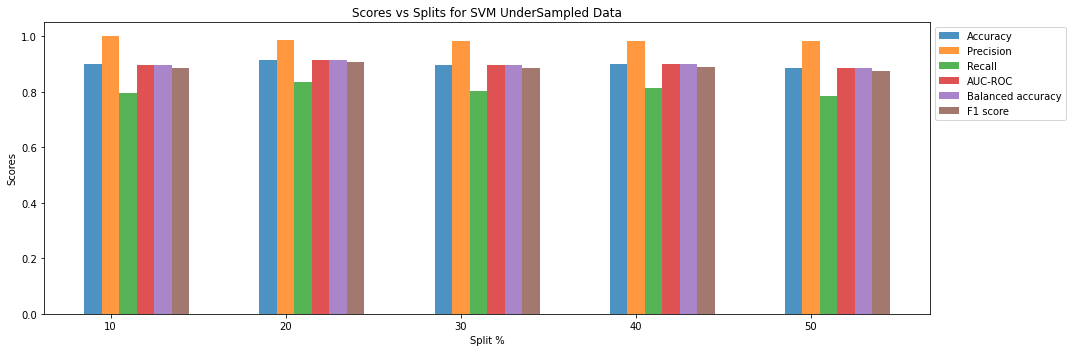

In [0]:
x = np.arange(len(splits))
width = 0.1
opacity = 0.8
# fig, ax = plt.subplots()

# vertical bar graph
plt.figure(figsize=(15, 5))
bar1 = plt.bar(x, accuracy, width, alpha=opacity, label='Accuracy')
bar2 = plt.bar(x+width, precision, width, alpha=opacity, label='Precision')
bar3 = plt.bar(x+(2*width), recall, width, alpha=opacity, label='Recall')
bar4 = plt.bar(x+(3*width), auc, width, alpha=opacity, label='AUC-ROC')
bar5 = plt.bar(x+(4*width), balanced, width, alpha=opacity, label='Balanced accuracy')
bar5 = plt.bar(x+(5*width), f1, width, alpha=opacity, label='F1 score')

plt.xlabel('Split %')
plt.ylabel('Scores')
plt.title('Scores vs Splits for SVM UnderSampled Data')
plt.xticks(x+width, splits)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

plt.tight_layout()
plt.show()

As the results are good, that is, high balanced accuracy and recall without any overfitting signs, we will plot the ROC and PR curves for this model at the split with highest balanced accuracy of data.

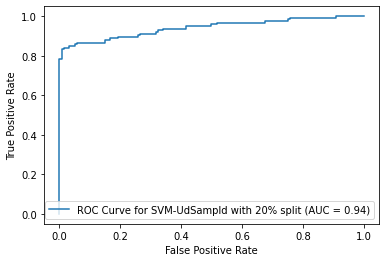

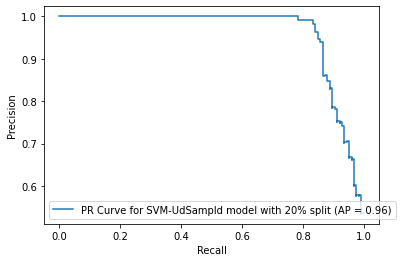

In [0]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle = True, random_state=42, stratify=None)
plot_roc_curve(models[0], X_test, Y_test, name='ROC Curve for SVM-UdSampld with 20% split')
plt.show()

# pr curve
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle = True, random_state=42, stratify=None)
# models[0].fit(X_train, Y_train)
plot_precision_recall_curve(models[0], X_test, Y_test, name='PR Curve for SVM-UdSampld model with 20% split')
plt.show()

As we have seen that the model shows good balanced accuracies, we can now test the model on the whole data using the best parameters.

In [0]:
X_full_train, X_full_test, Y_full_train, Y_full_test = train_test_split(X_full, Y_full, test_size=0.25, shuffle = True, random_state=42, stratify=None)
# train
model = SVC(C = best_c, kernel='linear')
model.fit(X_train, Y_train)
sc = StandardScaler()
X_full_train = sc.fit_transform(X_full_train)
X__full_test = sc.transform(X_full_test)
Y_full_pred = model.predict(X_full_test)

print(classification_report(Y_full_test, Y_full_pred))
fpr, tpr, _ = roc_curve(Y_full_test, Y_full_pred)
p, r, _ = precision_recall_curve(Y_full_test, Y_full_pred)
cfm = confusion_matrix(Y_full_test, Y_full_pred)
acc = accuracy_score(Y_full_test, Y_full_pred)
prec_score = precision_score(Y_full_test, Y_full_pred)
recall_scr = recall_score(Y_full_test, Y_full_pred)
roc_scr = roc_auc_score(Y_full_test, Y_full_pred)
bal_acry = balanced_accuracy_score(Y_full_test, Y_full_pred)
f1_scry = f1_score(Y_full_test, Y_full_pred)


print("Confusion Matrix for test on whole data:")
print(cfm)
    
print("----------")
print("SVM scores for test on whole data:")
print("Accuracy score = {}".format(acc))
print("Precision score = {}".format(prec_score))
print("Recall score = {}".format(recall_scr))
print("AUC_ROC score = {}".format(roc_scr))
print("Balanced accuracy score = {}".format(bal_acry))
print("F1 score = {}".format(f1_scry))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71089
           1       0.15      0.78      0.26       113

    accuracy                           0.99     71202
   macro avg       0.58      0.89      0.63     71202
weighted avg       1.00      0.99      1.00     71202

Confusion Matrix for test on whole data:
[[70604   485]
 [   25    88]]
----------
SVM scores for test on whole data:
Accuracy score = 0.9928372798516896
Precision score = 0.15357766143106458
Recall score = 0.7787610619469026
AUC_ROC score = 0.8859693140481886
Balanced accuracy score = 0.8859693140481886
F1 score = 0.2565597667638484


The accuracy of the model is high, but the recall is low. This means that due to the imbalance in data, the accuracy is high, but as the focus should be on the recall scores, as they define the number of fradulent transactions getting classified correctly. 

We will now plot the ROC and PR curves for the model.

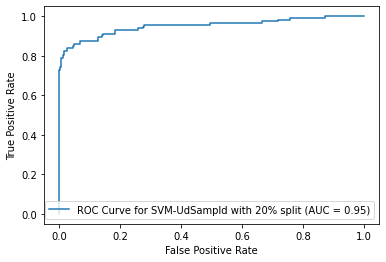

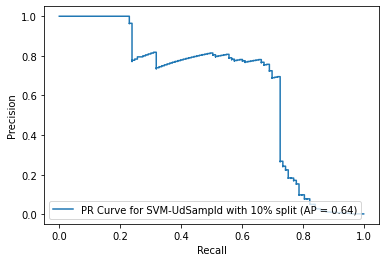

In [0]:
X_full_train, X_full_test, Y_full_train, Y_full_test = train_test_split(X_full, Y_full, test_size=0.25, shuffle = True, random_state=42, stratify=None)
plot_roc_curve(model, X_full_test, Y_full_test, name='ROC Curve for SVM-UdSampld with 20% split')
plt.show()

# pr curve
X_full_train, X_full_test, Y_full_train, Y_full_test = train_test_split(X_full, Y_full, test_size=0.25, shuffle = True, random_state=42, stratify=None)
# models[0].fit(X_train, Y_train)
plot_precision_recall_curve(model, X_full_test, Y_full_test, name='PR Curve for SVM-UdSampld with 10% split')
plt.show()

The results are promising, but as we have seen the results from Logistic Regression before, the accuracies are lower when compared.

This shows that for the problem of Credit Card Fraud Detection, Logic Regression performs better than SVMs.